<a href="https://colab.research.google.com/github/khawla-T/NeuralNetwork/blob/main/TreeWiltL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detect Tree Wilt with Neural Network

This is a classification method for detecting diseased trees (Japanese Oak Wilt and Japanese Pine Wilt).It uses satellite imagery.

The variable to be predicted is binary (disease region or not). Therefore, this is a classification project.

The goal here is to model the probability that a region of trees presents wilt, conditioned on the image features.

[Inspired by](https://www.neuraldesigner.com/learning/examples/tree-wilt-detection/)

# Data Set

the number of variables is 6, and the number of instances is 574.

The total number of variables is 6:


*   glcm: Mean gray level co-occurrence matrix (GLCM) texture index.
*   green: Mean green (G) value.
*   red: Mean red (R) value.
*   nir: Mean near-infrared (NIR) value.
*   pan_band: Standard deviation.
*   class: '1' (diseased trees), '0' (all other land cover)

This data represents satellite images of forest areas taken with four-channel imagery. This technique records the near-infrared frequencies, which vegetation reflects greatly for cooling purposes, as it absorbs most of the visible light as the energy source for photosynthesis.


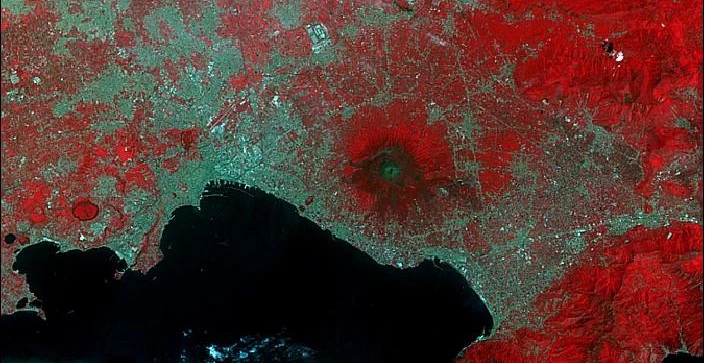

















[Dataset Source](https://archive.ics.uci.edu/dataset/285/wilt)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras import optimizers
from sklearn.model_selection import train_test_split
# Helper libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

**Optain the dataset**

In [ ]:
#This data is unbalanced but large
df = pd.read_csv('training.csv')

In [ ]:
df_test = pd.read_csv('testing.csv')

Divide the class and data

In [ ]:
y = df.iloc[:,0]
X = df.iloc[:,1:6]

In [ ]:
X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,1:6]

In [ ]:
X_train = X
X_test = X_test
y_train = y
y_test = y_test

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# **Building and Training First Neural Network**
The number of inputs is 5, and the number of outputs is 1. Therefore, our neural network will be composed of 5 scaling neurons and one probabilistic neuron. The binary probabilistic method will be set for this case since here we have a binary classification model.

The binary probabilistic method will be set for this case since here we have a binary classification model. Nevertheless, choosing the continuous probabilistic method would also be correct.

In [ ]:
keras.utils.set_random_seed(45)

model = Sequential([

    Dense(1, activation='sigmoid'),
])

optimizer=optimizers.Adam(clipnorm=0.01)

model.compile(optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

hist = model.fit(X_train, y_train,
          batch_size=40, epochs=1,
          validation_data=(X_val, y_val))

66/66 [==============================] - 1s 3ms/step - loss: 1.1655 - accuracy: 0.9846 - val_loss: 1.4782 - val_accuracy: 0.9770


In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.9597


[0.3678555190563202, 0.9596773982048035]

**Dealing with unbalanced classes by changing the weights **

In [ ]:

keras.utils.set_random_seed(45)

model = Sequential([
   # Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01),  input_shape=(5,)),#
    #Dense(12, activation='relu',kernel_regularizer=regularizers.l2(0.01) ),#kernel_regularizer='l2'
   # Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dense(3, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid'),
])

optimizer=optimizers.Adam(clipnorm=0.01)

model.compile(optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])
# Adding weights for ones as it the lesser
class_weight = {0: 1.,
                1: 6.}
hist = model.fit(X_train, y_train,
          batch_size=40, epochs=1,
          validation_data=(X_val, y_val),
          class_weight=class_weight)

82/82 [==============================] - 1s 3ms/step - loss: 7.0946 - accuracy: 0.9828 - val_loss: 0.7931 - val_accuracy: 0.9834


**Build the NN after SMOTE dataset**

**Create artificial data with SMOTE for unbalanced data **





In [ ]:
print(len(y_train),len(X_train))

2603 2603


In [ ]:
# create artificial data with SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
# count number of records in each class

print(len(y_train_smote),len(X_train_smote))

5126 5126


In [ ]:

keras.utils.set_random_seed(45)

model = Sequential([
    Dense(3, activation='relu',kernel_regularizer=regularizers.l2(0.01),  input_shape=(5,)),#
    #Dense(12, activation='relu',kernel_regularizer=regularizers.l2(0.01) ),#kernel_regularizer='l2'
   # Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dense(3, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid'),
])

optimizer=optimizers.Adam(clipnorm=0.01)

model.compile(optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

hist = model.fit(X_train_smote, y_train_smote,
          batch_size=40, epochs=1,
          validation_data=(X_val, y_val))

129/129 [==============================] - 1s 2ms/step - loss: 0.8556 - accuracy: 0.4883 - val_loss: 0.7394 - val_accuracy: 0.9654


In [ ]:
model_with_smote.evaluate(X_test, y_test)

28/28 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.8952


[0.7233151793479919, 0.8951612710952759]

# **Using Balanced dataset **
This section demonstrate how the small amount of data can lead to less accuracy even if we complicate the model.
The data is balanced in both classes with only 575 entries divided into train, validate and test.
The highest accuracy reached is 86%
[DataSource ](https://)
https://github.com/jar3m/c_neuralnetwork/blob/7cd0547128acda942117425e080b2070f3190412/examples/tree_wilt/tree_wilt.csv#L4

**Getting the data **

In [ ]:
#This data is samll but balanced
df_2 = pd.read_csv('tree_wilt.csv')

In [ ]:
y_2 = df_2.iloc[:,5]
X_2 = df_2.iloc[:,1:6]

In [ ]:
X_2train,X_2test,y_2train,y_2test=train_test_split(X_2,y_2,test_size=0.2,random_state=1)

X_2train, X_2val, y_2train, y_2val = train_test_split(X_2train, y_2train, test_size=0.25, random_state=1)

**Building the NN**

In [ ]:
keras.utils.set_random_seed(45)

model_balance= Sequential([
    #Dense(70, activation='relu',kernel_regularizer=regularizers.l2(0.01),  input_shape=(5,)),#
    Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.01) ),#kernel_regularizer='l2'
    Dense(70, activation='relu', ),
    Dense(55, activation='relu', ),
    Dense(40, activation='relu'),
    Dense(33, activation='relu'),
    Dense(18, activation='relu' ),
    Dense(6, activation='relu' ),
    Dense(1, activation='sigmoid'),
])

optimizer=optimizers.Adam(clipnorm=0.01)

model_balance.compile(optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

hist = model_balance.fit(X_2train, y_2train,
          batch_size=40, epochs=8,
          validation_data=(X_2val, y_2val))

Epoch 1/8
9/9 [==============================] - 3s 37ms/step - loss: 2.1602 - accuracy: 0.5234 - val_loss: 0.7806 - val_accuracy: 0.5614
Epoch 2/8
9/9 [==============================] - 0s 10ms/step - loss: 0.7766 - accuracy: 0.5906 - val_loss: 0.7323 - val_accuracy: 0.8333
Epoch 3/8
9/9 [==============================] - 0s 11ms/step - loss: 0.7415 - accuracy: 0.6082 - val_loss: 0.7695 - val_accuracy: 0.5614
Epoch 4/8
9/9 [==============================] - 0s 10ms/step - loss: 0.7461 - accuracy: 0.5526 - val_loss: 0.6708 - val_accuracy: 0.5877
Epoch 5/8
9/9 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.6579 - val_loss: 0.7232 - val_accuracy: 0.7105
Epoch 6/8
9/9 [==============================] - 0s 7ms/step - loss: 0.7311 - accuracy: 0.6579 - val_loss: 0.6523 - val_accuracy: 0.7368
Epoch 7/8
9/9 [==============================] - 0s 8ms/step - loss: 0.6901 - accuracy: 0.6813 - val_loss: 0.5009 - val_accuracy: 0.8158
Epoch 8/8
9/9 [======================

In [ ]:
model_balance.evaluate(X_2test, y_2test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5320 - accuracy: 0.8609


[0.5320096611976624, 0.8608695864677429]

**Build the NN after SMOTE dataset**

Create artificial data with SMOTE for balanced-samll data

In [ ]:
print(len(y_2train),len(X_2train))

342 342


In [ ]:
# create artificial data with SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_2train, y_2train)

In [ ]:
# count number of records in each class

print(len(y_train_smote),len(X_train_smote))

358 358


**Building NN for using SMOTE data**

In [ ]:

keras.utils.set_random_seed(45)

model = Sequential([
    Dense(3, activation='relu',kernel_regularizer=regularizers.l2(0.01),  input_shape=(5,)),#
    #Dense(12, activation='relu',kernel_regularizer=regularizers.l2(0.01) ),#kernel_regularizer='l2'
   # Dense(15, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #Dense(3, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid'),
])

optimizer=optimizers.Adam(clipnorm=0.01)

model.compile(optimizer,
              loss="binary_crossentropy",
              metrics=['accuracy'])

hist = model.fit(X_train_smote, y_train_smote,
          batch_size=40, epochs=1,
          validation_data=(X_val, y_val))

9/9 [==============================] - 1s 31ms/step - loss: 41.6870 - accuracy: 0.5000 - val_loss: 1.0911 - val_accuracy: 0.9429


# **Findings:**
We found this problem is easy to be solved by NN. If the data was big, we recommend using NN.


*   Unbalanced data without SMOTE --> accurcy: 0.9770
*   Unbalanced data with SMOTE    --> accurcy: 0.9654  
*   Unbalanced data with class weighting    --> accurcy: 0.9834  
*   balanced data without SMOTE   --> accurcy:0.8609
*   balanced data without SMOTE --> accurcy: 0.9429







